<h3> <b> Import Libraries </b> <img src="https://preview.redd.it/snoovatar/avatars/nftv2_bmZ0X2VpcDE1NToxMzdfZWI5NTlhNzE1ZGZmZmU2ZjgyZjQ2MDU1MzM5ODJjNDg1OWNiMTRmZV8yMTQ1NzYzNg_rare_46f1cdb1-634f-4c1d-8344-2be06c7880d4-headshot.png?width=256&height=256&crop=smart&auto=webp&s=400ead9440c7a9f06ca4c44953f24c5b765c4aac" width=150 style="vertical-align: middle"> </h3>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
#-------------------------------------------------------------------------------------------------------#
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, balanced_accuracy_score, f1_score, roc_auc_score,roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
#-------------------------------------------------------------------------------------------------------#
import torch
import torch.nn as nn 
from torch.utils.data import DataLoader, TensorDataset ,random_split
import torch.optim as optim

# 1.0 Initial analysis

In [2]:
df = pd.read_csv('parkinsons_disease_data.csv')

print(f" The size of the dataset is : {df.shape[0]} rows, {df.shape[1]} columns ")

 The size of the dataset is : 2105 rows, 35 columns 


In [3]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury',
       'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment',
       'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis',
       'DoctorInCharge'],
      dtype='object')

In [4]:
df.head(5)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


In [5]:
df.isnull().sum().sum()

0

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,...,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,4110.000000,69.601900,0.492637,0.692637,1.337292,27.209493,0.296437,10.040413,5.016674,4.912901,...,15.094314,4.989694,0.431829,0.252732,0.207601,0.138717,0.295012,0.245131,0.296912,0.619477
std,607.805479,11.594511,0.500065,1.003827,0.895840,7.208099,0.456795,5.687014,2.890919,2.872115,...,8.643014,2.933877,0.495449,0.434682,0.405686,0.345733,0.456156,0.430267,0.457006,0.485631
min,3058.000000,50.000000,0.000000,0.000000,0.000000,15.008333,0.000000,0.002228,0.004157,0.000011,...,0.021191,0.001505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3584.000000,60.000000,0.000000,0.000000,1.000000,20.782176,0.000000,5.150278,2.455703,2.478503,...,7.517160,2.415890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4110.000000,70.000000,0.000000,0.000000,1.000000,27.184571,0.000000,10.070337,5.031550,4.825187,...,14.963574,4.983227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4636.000000,80.000000,1.000000,1.000000,2.000000,33.462452,1.000000,14.829565,7.512795,7.381487,...,22.608362,7.484220,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,5162.000000,89.000000,1.000000,3.000000,3.000000,39.999887,1.000000,19.988866,9.995255,9.995864,...,29.970107,9.992697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null  

### 1.2 Analysis of the distributions and outliers of the variables:


Class distribution analysis for column: DoctorInCharge

Class details:
                Count  Percentage (%) Imbalance
DoctorInCharge                                 
DrXXXConfid      2105           100.0    1.00:1

Imbalance ratio: 1.00:1

--------------------------------------------------

Class distribution analysis for column: Gender

Class details:
        Count  Percentage (%) Imbalance
Gender                                 
0        1068           50.74    1.03:1
1        1037           49.26    1.03:1

Imbalance ratio: 1.03:1

--------------------------------------------------

Class distribution analysis for column: Ethnicity

Class details:
           Count  Percentage (%) Imbalance
Ethnicity                                 
0           1270           60.33    6.45:1
1            425           20.19    6.45:1
3            213           10.12    6.45:1
2            197            9.36    6.45:1

Imbalance ratio: 6.45:1

--------------------------------------------------

Cla

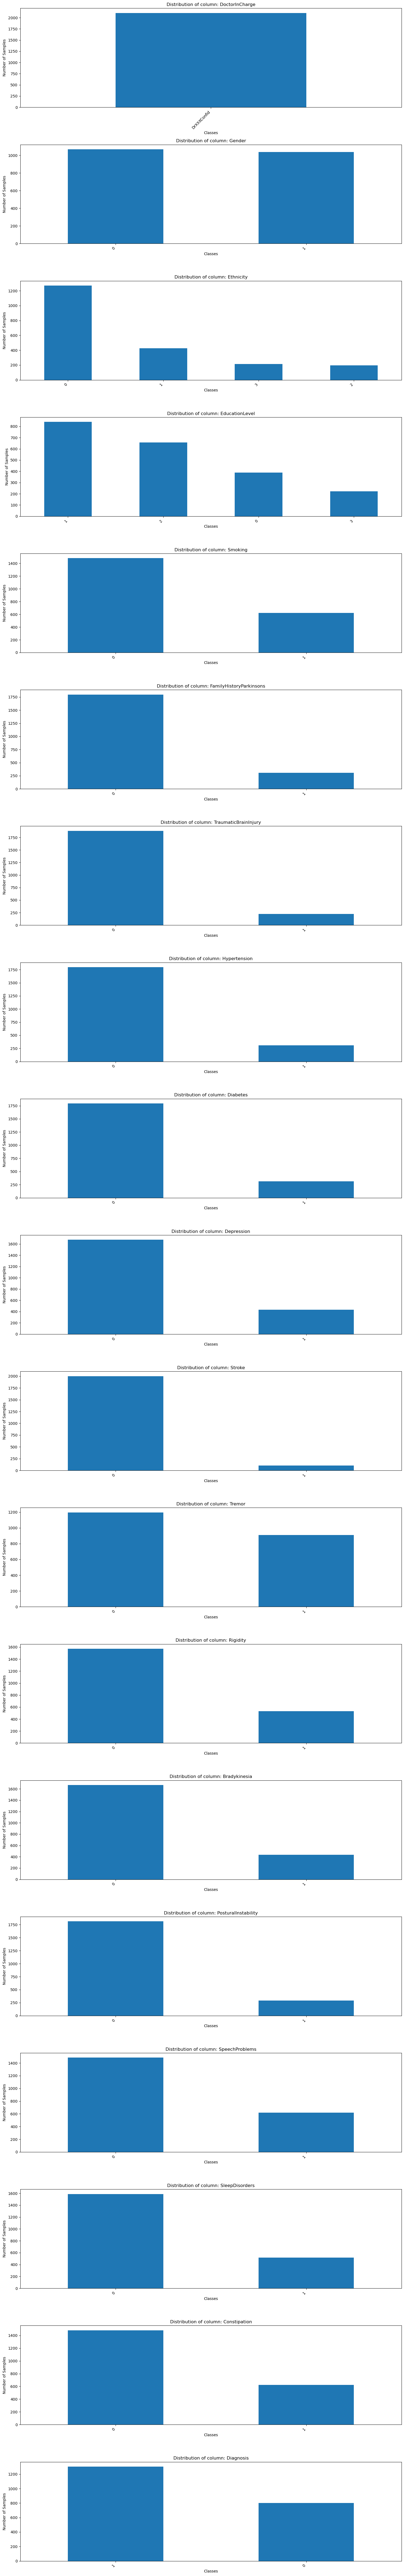

In [9]:
def analyze_class_distribution(df):
    # Dictionary to store information
    distribution_analysis = {}

    # Identify categorical columns or those that can be treated as classes
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns

    # Add numeric columns that appear to be categorical
    numeric_categorical_columns = [col for col in df.select_dtypes(include=['int64', 'float64']).columns  if df[col].nunique() < 10]  # Consider columns with few unique values

    # Combine the columns
    class_columns = list(categorical_columns) + numeric_categorical_columns

    # Analysis for each potential class column
    for column in class_columns:
        # Count the classes
        value_counts = df[column].value_counts()

        # Percentage distribution
        value_percentages = df[column].value_counts(normalize=True) * 100

        # Calculate imbalance (ratio between the most and least frequent class)
        class_balance_ratio = value_counts.max() / value_counts.min()

        # Prepare the results
        distribution_info = pd.DataFrame({
            'Count': value_counts,
            'Percentage (%)': value_percentages.round(2),
        })

        # Additional information
        distribution_info['Imbalance'] = f'{class_balance_ratio:.2f}:1'

        distribution_analysis[column] = {
            'distribution': distribution_info,
            'imbalance_ratio': class_balance_ratio
        }

    return distribution_analysis

# Function to print the results
def print_distribution_analysis(distribution_analysis):
    for column, analysis in distribution_analysis.items():
        print(f"\nClass distribution analysis for column: {column}")
        print("\nClass details:")
        print(analysis['distribution'])
        print(f"\nImbalance ratio: {analysis['imbalance_ratio']:.2f}:1\n")
        print("-" * 50)

# If you have a DataFrame named df
distribution_analysis = analyze_class_distribution(df)
print_distribution_analysis(distribution_analysis)

# Visualization function
def plot_class_distributions(distribution_analysis):
    plt.figure(figsize=(15, 5 * len(distribution_analysis)))

    for i, (column, analysis) in enumerate(distribution_analysis.items(), 1):
        plt.subplot(len(distribution_analysis), 1, i)
        analysis['distribution']['Count'].plot(kind='bar')
        plt.title(f'Distribution of column: {column}')
        plt.xlabel('Classes')
        plt.ylabel('Number of Samples')
        plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

# Call the visualization function
plot_class_distributions(distribution_analysis)


# Neural Network without Bootstrap

In [10]:
from models.ImproveClassifierNet import ImprovedDeepBinaryClassifierNet
from models.BinaryClassifierNet import BinaryClassifierNet

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [11]:
X = df.drop('Diagnosis', axis=1)
X = X.drop('DoctorInCharge', axis=1)
X=X.drop("PatientID", axis=1)
y = df['Diagnosis']

# Divisione in training e test set (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scalatura delle features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Conversione dei dati in tensori Pytorch e invio al dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).to(device)


print(f"Dimensione di X_train: {X_train_tensor.shape}")
print(f"Dimensione di X_test: {X_test_tensor.shape}")

Dimensione di X_train: torch.Size([1684, 32])
Dimensione di X_test: torch.Size([421, 32])


In [12]:
# Creazione dei dataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [13]:
# Crea DataLoader per il training, la validazione e il test
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Training set size: {len(train_loader.dataset)}")
print(f"Test set size: {len(test_loader.dataset)}")

Training set size: 1684
Test set size: 421


## BinaryClassifierNet 

In [14]:
net = BinaryClassifierNet().to(device)
criterion =  nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [15]:
# Initialize lists to store metrics
train_losses = []
train_accuracies = []

num_epochs = 10
# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    total_batches = 0

    # Training Phase
    net.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        total_batches += 1

    # Calculate average loss for the training epoch
    avg_train_loss = running_loss / total_batches
    train_losses.append(avg_train_loss)

    # Calculate training accuracy
    y_pred = (outputs > 0.7).float()  
    train_accuracy = (y_pred == labels).sum().item() / labels.size(0)
    train_accuracies.append(train_accuracy)

    print(f'Epoch {epoch + 1}, Average Training Loss: {avg_train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}')

print('Finished Training')


Epoch 1, Average Training Loss: 0.5820, Training Accuracy: 0.8500
Epoch 2, Average Training Loss: 0.4426, Training Accuracy: 0.6500
Epoch 3, Average Training Loss: 0.3867, Training Accuracy: 0.8000
Epoch 4, Average Training Loss: 0.3584, Training Accuracy: 0.8500
Epoch 5, Average Training Loss: 0.3341, Training Accuracy: 0.8000
Epoch 6, Average Training Loss: 0.3085, Training Accuracy: 0.9000
Epoch 7, Average Training Loss: 0.2835, Training Accuracy: 0.8000
Epoch 8, Average Training Loss: 0.2672, Training Accuracy: 0.9500
Epoch 9, Average Training Loss: 0.2522, Training Accuracy: 0.8500
Epoch 10, Average Training Loss: 0.2396, Training Accuracy: 0.8500
Finished Training


Accuracy on the test set: 79.10%
Precision: 0.87
Recall: 0.78
F1 Score: 0.82


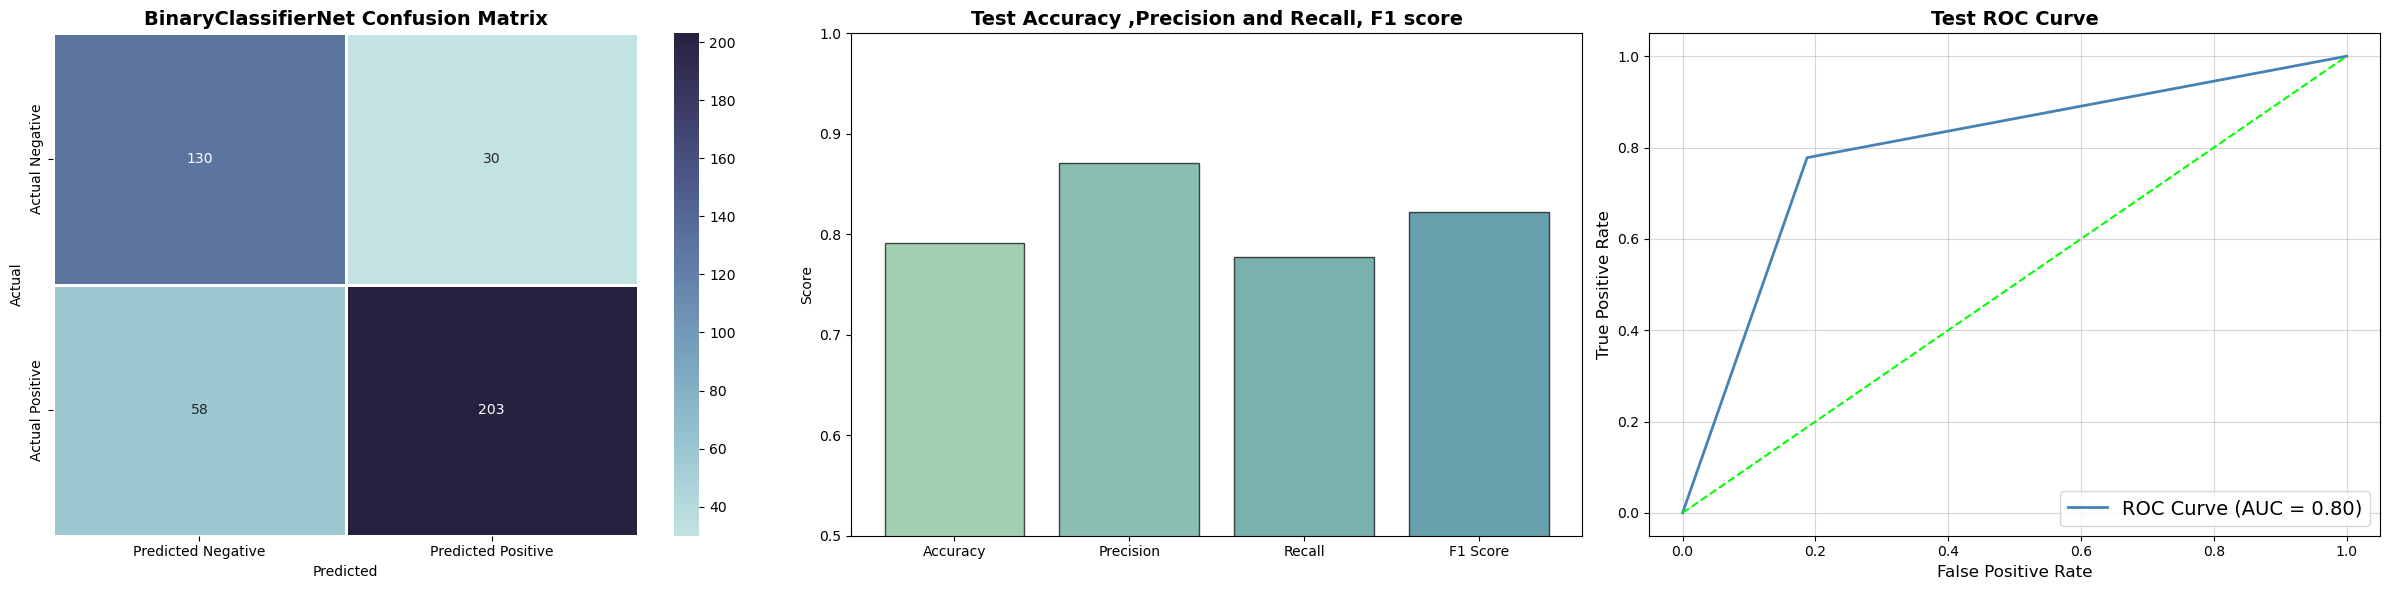

In [16]:
from sklearn.metrics import roc_curve, auc
# Evaluate on Test Set
correct = 0
total = 0
all_predictions = []
all_labels = []

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data

        # Transfer data to GPU if available
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = net(inputs)

        # Binary classification: use a threshold of 0.7 to decide the class
        predicted = (outputs > 0.7).float()

        # Add predictions and labels
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        # Calculate accuracy
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_predictions)

# Calculate precision, recall, and F1-score
precision = precision_score(all_labels, all_predictions, average='binary')
recall = recall_score(all_labels, all_predictions, average='binary')
f1 = f1_score(all_labels, all_predictions, average='binary')
accuracy= correct / total

# Print accuracy and other metrics
print(f'Accuracy on the test set: {accuracy*100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Plot Confusion Matrix
fpr, tpr, thresholds = roc_curve(all_labels, all_predictions)
roc_auc = auc(fpr, tpr)

# Plot Confusion Matrix and ROC Curve
plt.figure(figsize=(24, 6))

# Confusion Matrix
plt.subplot(1, 3, 1)
sns.heatmap(cm, annot=True, fmt='.0f', cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True),
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'], linewidths=1, linecolor="white")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('BinaryClassifierNet Confusion Matrix', fontsize=14, weight="bold")

plt.subplot(1,3,2)

plt.bar(['Accuracy', 'Precision', 'Recall', 'F1 Score'], [accuracy, precision, recall, f1], color=sns.color_palette("crest", as_cmap=False),edgecolor="black",alpha=0.7)
plt.ylabel('Score')
plt.ylim(0.5,1.0)
plt.title('Test Accuracy ,Precision and Recall, F1 score',fontsize=14, weight="bold")

# ROC Curve
plt.subplot(1, 3, 3)
plt.plot(fpr, tpr, color='steelblue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='lime', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.title('Test ROC Curve', fontsize=14, weight="bold")
plt.legend(loc='lower right',fontsize=14)
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()


## ImprovedDeepBinaryClassifierNet

In [17]:
net = ImprovedDeepBinaryClassifierNet().to(device)
criterion =  nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [18]:
# Initialize lists to store metrics
train_losses = []
train_accuracies = []

num_epochs = 10
# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    total_batches = 0

    # Training Phase
    net.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        total_batches += 1

    # Calculate average loss for the training epoch
    avg_train_loss = running_loss / total_batches
    train_losses.append(avg_train_loss)

    # Calculate training accuracy
    y_pred = (outputs > 0.7).float()  
    train_accuracy = (y_pred == labels).sum().item() / labels.size(0)
    train_accuracies.append(train_accuracy)

    print(f'Epoch {epoch + 1}, Average Training Loss: {avg_train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}')

print('Finished Training')


Epoch 1, Average Training Loss: 0.6081, Training Accuracy: 0.6500
Epoch 2, Average Training Loss: 0.4361, Training Accuracy: 0.9500
Epoch 3, Average Training Loss: 0.3581, Training Accuracy: 0.8500
Epoch 4, Average Training Loss: 0.3192, Training Accuracy: 0.9000
Epoch 5, Average Training Loss: 0.2776, Training Accuracy: 0.8500
Epoch 6, Average Training Loss: 0.2503, Training Accuracy: 0.9000
Epoch 7, Average Training Loss: 0.2198, Training Accuracy: 0.9500
Epoch 8, Average Training Loss: 0.2117, Training Accuracy: 0.8500
Epoch 9, Average Training Loss: 0.1560, Training Accuracy: 0.9500
Epoch 10, Average Training Loss: 0.1532, Training Accuracy: 0.8500
Finished Training


Accuracy on the test set: 77.20%
Precision: 0.85
Recall: 0.76
F1 Score: 0.81


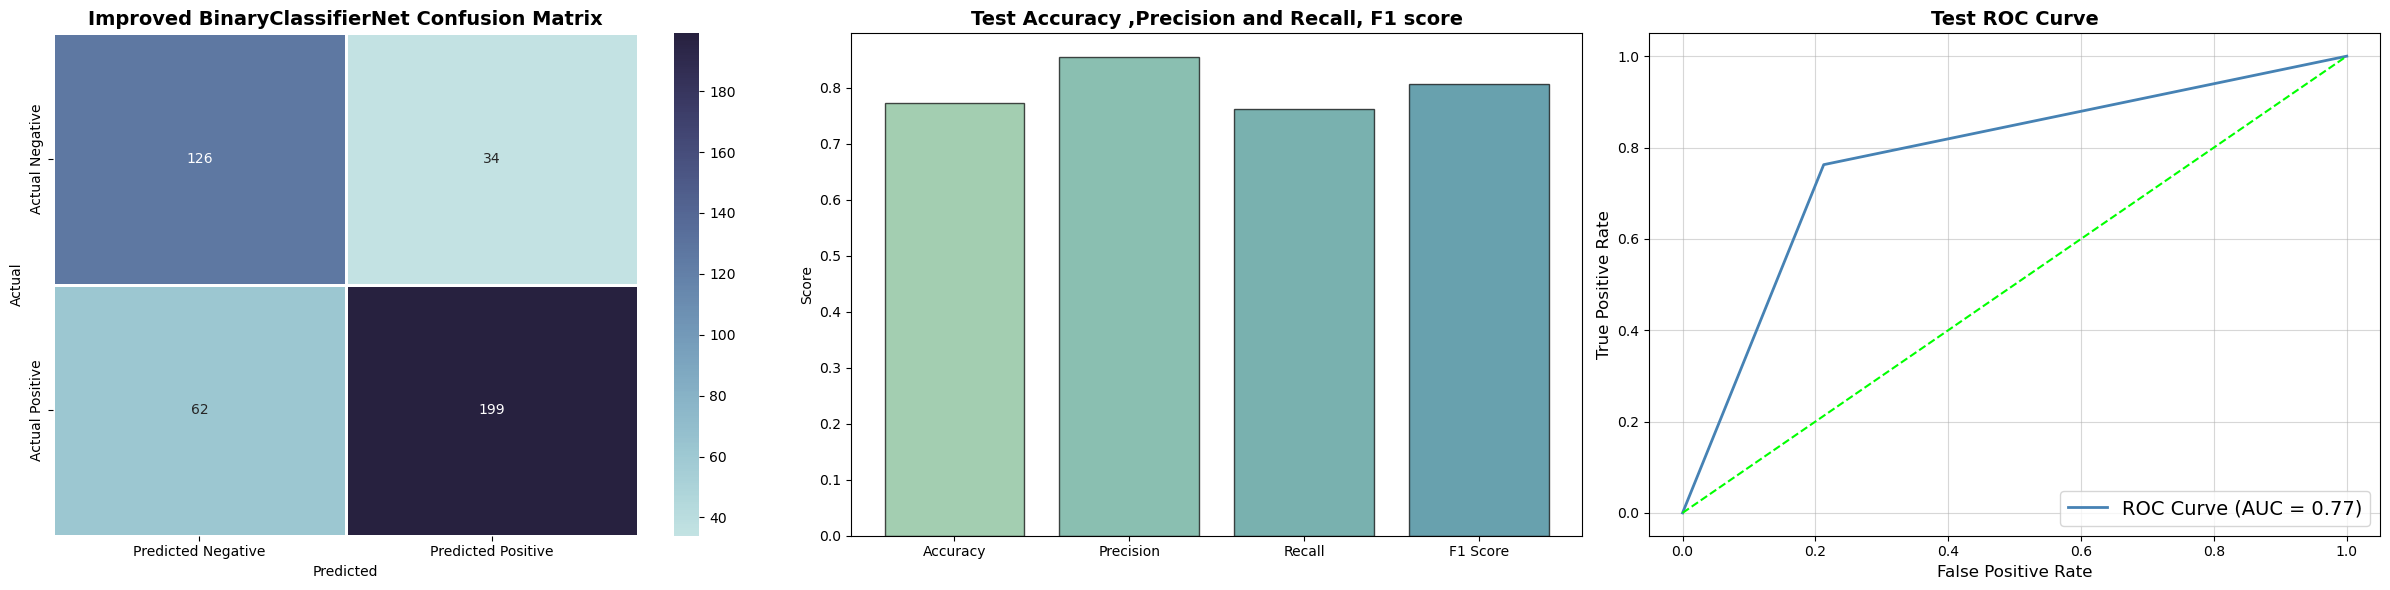

In [19]:
# Evaluate on Test Set
correct = 0
total = 0
all_predictions = []
all_labels = []

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data

        # Transfer data to GPU if available
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = net(inputs)

        # Binary classification: use a threshold of 0.7 to decide the class
        predicted = (outputs > 0.7).float()

        # Add predictions and labels
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        # Calculate accuracy
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_predictions)

# Calculate precision, recall, and F1-score
precision = precision_score(all_labels, all_predictions, average='binary')
recall = recall_score(all_labels, all_predictions, average='binary')
f1 = f1_score(all_labels, all_predictions, average='binary')
accuracy= correct / total

# Print accuracy and other metrics
print(f'Accuracy on the test set: {accuracy*100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Plot Confusion Matrix
fpr, tpr, thresholds = roc_curve(all_labels, all_predictions)
roc_auc = auc(fpr, tpr)

# Plot Confusion Matrix and ROC Curve
plt.figure(figsize=(24, 6))

# Confusion Matrix
plt.subplot(1, 3, 1)
sns.heatmap(cm, annot=True, fmt='.0f', cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True),
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'], linewidths=1, linecolor="white")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Improved BinaryClassifierNet Confusion Matrix', fontsize=14, weight="bold")

plt.subplot(1,3,2)

plt.bar(['Accuracy', 'Precision', 'Recall', 'F1 Score'], [accuracy, precision, recall, f1], color=sns.color_palette("crest", as_cmap=False),edgecolor="black",alpha=0.7)
plt.ylabel('Score')
plt.title('Test Accuracy ,Precision and Recall, F1 score',fontsize=14, weight="bold")


# ROC Curve
plt.subplot(1, 3, 3)
plt.plot(fpr, tpr, color='steelblue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='lime', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.title('Test ROC Curve', fontsize=14, weight="bold")
plt.legend(loc='lower right',fontsize=14)
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()


# Neural Network with Bootstrap

In [20]:
# Creates a bootstrap sample from 'df' with 20,000 samples, drawn with replacement.

df_bootstrap = resample(df, replace=True, n_samples=20000, random_state=42)

X = df_bootstrap.drop('Diagnosis', axis=1)
X = X.drop('DoctorInCharge', axis=1)
X= X.drop("PatientID", axis=1)
y = df_bootstrap['Diagnosis']

# Division into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Converting data to Pytorch tensors and sending to device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).to(device)


print(f"Size of X_train: {X_train_tensor.shape}")
print(f"Size of X_test: {X_test_tensor.shape}")

Size of X_train: torch.Size([16000, 32])
Size of X_test: torch.Size([4000, 32])


In [21]:
from torch.utils.data import TensorDataset

# Creazione dei dataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [22]:
# Imposta la dimensione per la divisione
train_size = int(0.7 * len(train_dataset))  # 80% per l'addestramento
val_size = len(train_dataset) - train_size  # 20% per la validazione

# Dividi il train_dataset in train e validation
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

# Crea DataLoader per il training, la validazione e il test
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print(f"Training set size: {len(train_loader.dataset)}")
print(f"Validation set size: {len(val_loader.dataset)}")
print(f"Test set size: {len(test_loader.dataset)}")

Training set size: 11200
Validation set size: 4800
Test set size: 4000


## BinaryClassifierNet Traning

In [23]:
net = BinaryClassifierNet().to(device)
criterion =  nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)

In [24]:
# Initialize lists to store metrics
train_losses = []
train_accuracies = []
train_precisions = []
train_recalls = []
train_f1_scores = []

val_losses = []
val_accuracies = []
val_precisions = []
val_recalls = []
val_f1_scores = []

num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    total_batches = 0

    # Training Phase
    net.train()
    all_train_labels = []
    all_train_preds = []

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        total_batches += 1

        # Collect predictions and labels for metrics
        preds = (outputs > 0.7).float()
        all_train_preds.extend(preds.cpu().numpy())
        all_train_labels.extend(labels.cpu().numpy())

    # Calculate average loss for the training epoch
    avg_train_loss = running_loss / total_batches
    train_losses.append(avg_train_loss)

    # Calculate metrics for the training epoch
    train_accuracy = sum([p == l for p, l in zip(all_train_preds, all_train_labels)]) / len(all_train_labels)
    train_precision = precision_score(all_train_labels, all_train_preds, average='binary')
    train_recall = recall_score(all_train_labels, all_train_preds, average='binary')
    train_f1 = f1_score(all_train_labels, all_train_preds, average='binary')

    train_accuracies.append(train_accuracy)
    train_precisions.append(train_precision)
    train_recalls.append(train_recall)
    train_f1_scores.append(train_f1)

    print(f"Epoch {epoch + 1}, Training Loss: {avg_train_loss:.4f}, Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1 Score: {train_f1:.4f}")

    # Validation Phase
    net.eval()
    val_running_loss = 0.0
    correct = 0
    total = 0
    all_val_labels = []
    all_val_preds = []

    with torch.no_grad():
        for val_data in val_loader:
            val_inputs, val_labels = val_data

            # Forward pass
            val_outputs = net(val_inputs)

            # Compute loss
            val_loss = criterion(val_outputs, val_labels)
            val_running_loss += val_loss.item()

            # Collect predictions and labels for metrics
            val_predicted = (val_outputs > 0.7).float()
            all_val_preds.extend(val_predicted.cpu().numpy())
            all_val_labels.extend(val_labels.cpu().numpy())

    # Calculate average loss for the validation epoch
    avg_val_loss = val_running_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    # Calculate metrics for the validation epoch
    val_accuracy = sum([p == l for p, l in zip(all_val_preds, all_val_labels)]) / len(all_val_labels)
    val_precision = precision_score(all_val_labels, all_val_preds, average='binary')
    val_recall = recall_score(all_val_labels, all_val_preds, average='binary')
    val_f1 = f1_score(all_val_labels, all_val_preds, average='binary')

    val_accuracies.append(val_accuracy)
    val_precisions.append(val_precision)
    val_recalls.append(val_recall)
    val_f1_scores.append(val_f1)

    print(f"Epoch {epoch + 1}, Validation Loss: {avg_val_loss:.4f}, Accuracy: {val_accuracy:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1 Score: {val_f1:.4f}")

print('Finished Training')


Epoch 1, Training Loss: 0.6223, Accuracy: 0.4563, Precision: 0.9381, Recall: 0.1213, F1 Score: 0.2148
Epoch 1, Validation Loss: 0.5442, Accuracy: 0.5852, Precision: 0.9440, Recall: 0.3478, F1 Score: 0.5083
Epoch 2, Training Loss: 0.4943, Accuracy: 0.6713, Precision: 0.9400, Recall: 0.4954, F1 Score: 0.6489
Epoch 2, Validation Loss: 0.4570, Accuracy: 0.7194, Precision: 0.9376, Recall: 0.5836, F1 Score: 0.7194
Epoch 3, Training Loss: 0.4251, Accuracy: 0.7560, Precision: 0.9417, Recall: 0.6418, F1 Score: 0.7633
Epoch 3, Validation Loss: 0.4071, Accuracy: 0.7673, Precision: 0.9336, Recall: 0.6702, F1 Score: 0.7802
Epoch 4, Training Loss: 0.3871, Accuracy: 0.7896, Precision: 0.9379, Recall: 0.7034, F1 Score: 0.8039
Epoch 4, Validation Loss: 0.3796, Accuracy: 0.7904, Precision: 0.9342, Recall: 0.7100, F1 Score: 0.8068
Epoch 5, Training Loss: 0.3616, Accuracy: 0.8095, Precision: 0.9424, Recall: 0.7341, F1 Score: 0.8253
Epoch 5, Validation Loss: 0.3612, Accuracy: 0.8090, Precision: 0.9345, Rec

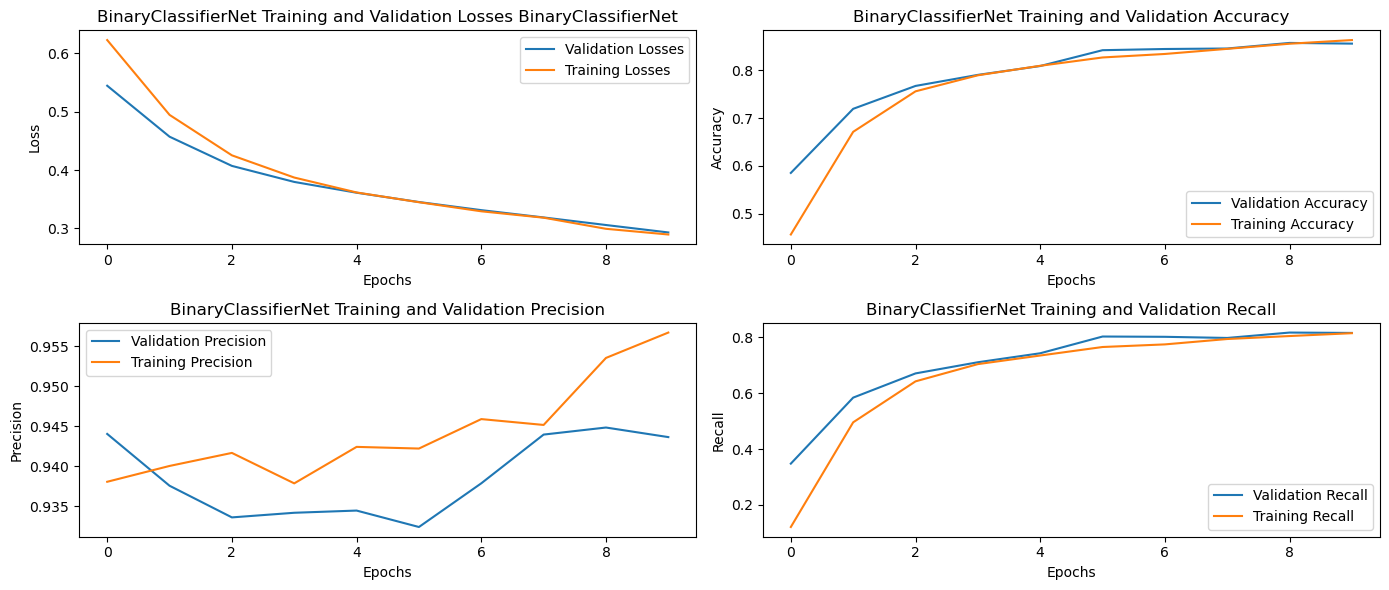

In [25]:
# Plotting metrics
plt.figure(figsize=(14, 6))

# First subplot (Training and Validation Losses)
plt.subplot(2, 2, 1)
plt.plot(val_losses, label='Validation Losses')
plt.plot(train_losses, label='Training Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('BinaryClassifierNet Training and Validation Losses BinaryClassifierNet')
plt.legend()

# Second subplot (Training and Validation Accuracy)
plt.subplot(2, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.plot(train_accuracies, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('BinaryClassifierNet Training and Validation Accuracy')
plt.legend()

# Third subplot (Training and Validation Precision)
plt.subplot(2, 2, 3)
plt.plot(val_precisions, label='Validation Precision')
plt.plot(train_precisions, label='Training Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('BinaryClassifierNet Training and Validation Precision')
plt.legend()

# Fourth subplot (Training and Validation Recall)
plt.subplot(2, 2, 4)
plt.plot(val_recalls, label='Validation Recall')
plt.plot(train_recalls, label='Training Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('BinaryClassifierNet Training and Validation Recall')
plt.legend()

plt.tight_layout()
plt.show()

Accuracy on the test set: 85.70%
Precision: 0.95
Recall: 0.81
F1 Score: 0.87


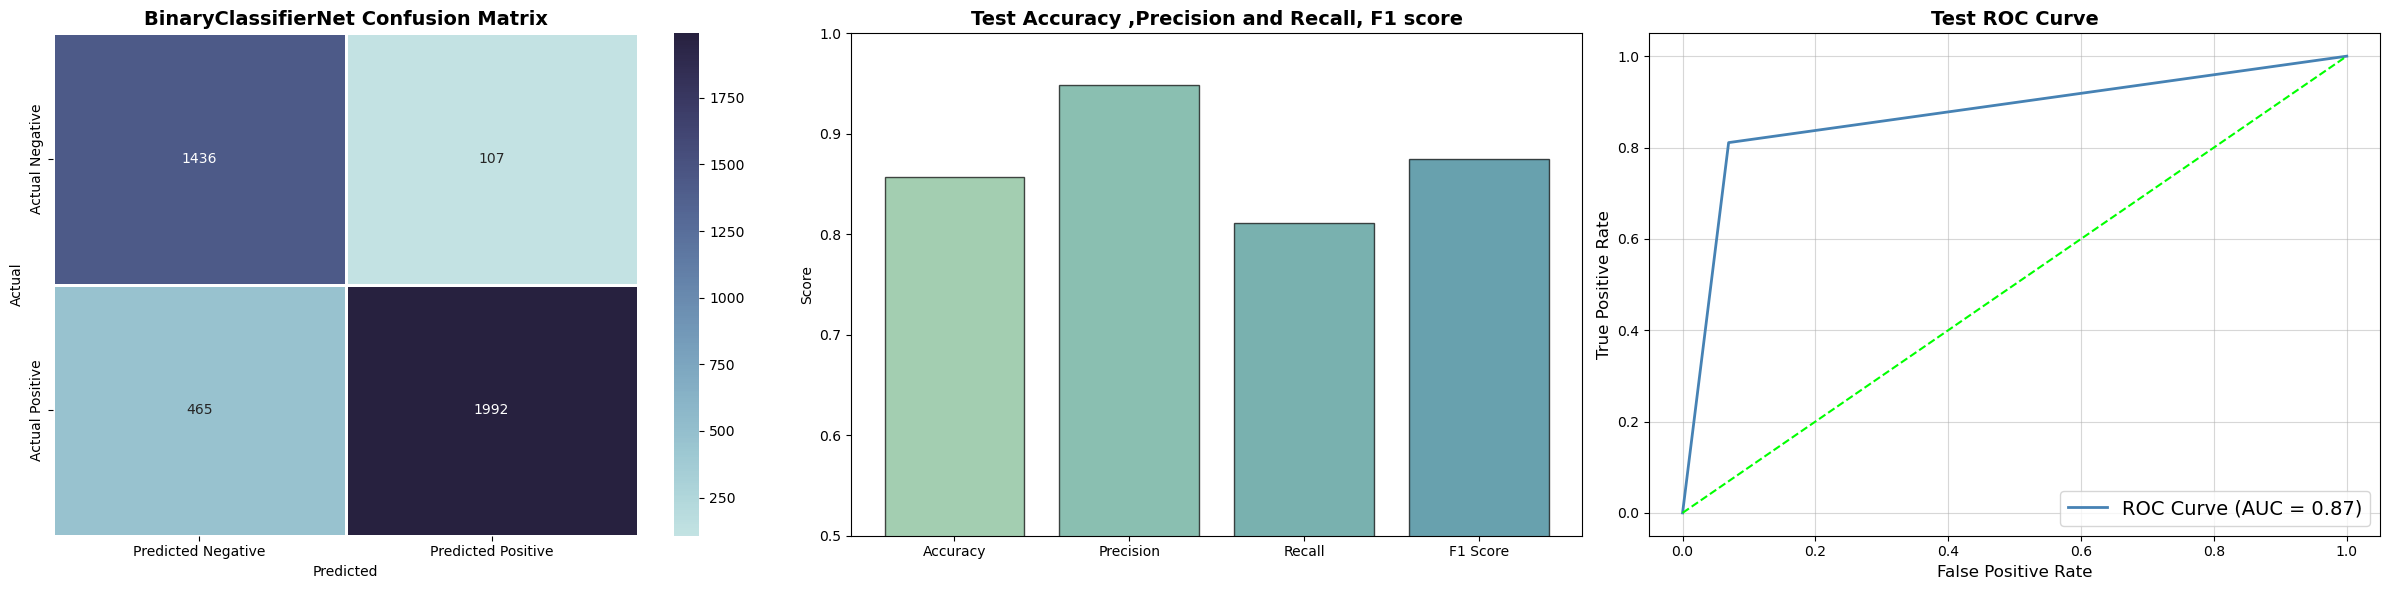

In [26]:
# Evaluate on Test Set
correct = 0
total = 0
all_predictions = []
all_labels = []

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data

        # Transfer data to GPU if available
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = net(inputs)

        # Binary classification: use a threshold of 0.7 to decide the class
        predicted = (outputs > 0.7).float()

        # Add predictions and labels
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        # Calculate accuracy
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_predictions)

# Calculate precision, recall, and F1-score
precision = precision_score(all_labels, all_predictions, average='binary')
recall = recall_score(all_labels, all_predictions, average='binary')
f1 = f1_score(all_labels, all_predictions, average='binary')
accuracy= correct / total

# Print accuracy and other metrics
print(f'Accuracy on the test set: {accuracy*100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Plot Confusion Matrix
fpr, tpr, thresholds = roc_curve(all_labels, all_predictions)
roc_auc = auc(fpr, tpr)

# Plot Confusion Matrix and ROC Curve
plt.figure(figsize=(24, 6))

# Confusion Matrix
plt.subplot(1, 3, 1)
sns.heatmap(cm, annot=True, fmt='.0f', cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True),
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'], linewidths=1, linecolor="white")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('BinaryClassifierNet Confusion Matrix', fontsize=14, weight="bold")

plt.subplot(1,3,2)

plt.bar(['Accuracy', 'Precision', 'Recall', 'F1 Score'], [accuracy, precision, recall, f1], color=sns.color_palette("crest", as_cmap=False),edgecolor="black",alpha=0.7)
plt.ylabel('Score')
plt.ylim(0.5,1.0)
plt.title('Test Accuracy ,Precision and Recall, F1 score',fontsize=14, weight="bold")


# ROC Curve
plt.subplot(1, 3, 3)
plt.plot(fpr, tpr, color='steelblue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='lime', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.title('Test ROC Curve', fontsize=14, weight="bold")
plt.legend(loc='lower right',fontsize=14)
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()


## Improved BinaryClassifierNet Traning

In [27]:
net = ImprovedDeepBinaryClassifierNet().to(device)
criterion =  nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)

In [28]:
# Initialize lists to store metrics
train_losses = []
train_accuracies = []
train_precisions = []
train_recalls = []
train_f1_scores = []

val_losses = []
val_accuracies = []
val_precisions = []
val_recalls = []
val_f1_scores = []

num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    total_batches = 0

    # Training Phase
    net.train()
    all_train_labels = []
    all_train_preds = []

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        total_batches += 1

        # Collect predictions and labels for metrics
        preds = (outputs > 0.7).float()
        all_train_preds.extend(preds.cpu().numpy())
        all_train_labels.extend(labels.cpu().numpy())

    # Calculate average loss for the training epoch
    avg_train_loss = running_loss / total_batches
    train_losses.append(avg_train_loss)

    # Calculate metrics for the training epoch
    train_accuracy = sum([p == l for p, l in zip(all_train_preds, all_train_labels)]) / len(all_train_labels)
    train_precision = precision_score(all_train_labels, all_train_preds, average='binary')
    train_recall = recall_score(all_train_labels, all_train_preds, average='binary')
    train_f1 = f1_score(all_train_labels, all_train_preds, average='binary')

    train_accuracies.append(train_accuracy)
    train_precisions.append(train_precision)
    train_recalls.append(train_recall)
    train_f1_scores.append(train_f1)

    print(f"Epoch {epoch + 1}, Training Loss: {avg_train_loss:.4f}, Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1 Score: {train_f1:.4f}")

    # Validation Phase
    net.eval()
    val_running_loss = 0.0
    correct = 0
    total = 0
    all_val_labels = []
    all_val_preds = []

    with torch.no_grad():
        for val_data in val_loader:
            val_inputs, val_labels = val_data

            # Forward pass
            val_outputs = net(val_inputs)

            # Compute loss
            val_loss = criterion(val_outputs, val_labels)
            val_running_loss += val_loss.item()

            # Collect predictions and labels for metrics
            val_predicted = (val_outputs > 0.7).float()
            all_val_preds.extend(val_predicted.cpu().numpy())
            all_val_labels.extend(val_labels.cpu().numpy())

    # Calculate average loss for the validation epoch
    avg_val_loss = val_running_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    # Calculate metrics for the validation epoch
    val_accuracy = sum([p == l for p, l in zip(all_val_preds, all_val_labels)]) / len(all_val_labels)
    val_precision = precision_score(all_val_labels, all_val_preds, average='binary')
    val_recall = recall_score(all_val_labels, all_val_preds, average='binary')
    val_f1 = f1_score(all_val_labels, all_val_preds, average='binary')

    val_accuracies.append(val_accuracy)
    val_precisions.append(val_precision)
    val_recalls.append(val_recall)
    val_f1_scores.append(val_f1)

    print(f"Epoch {epoch + 1}, Validation Loss: {avg_val_loss:.4f}, Accuracy: {val_accuracy:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1 Score: {val_f1:.4f}")

print('Finished Training')


Epoch 1, Training Loss: 0.6059, Accuracy: 0.5907, Precision: 0.7870, Recall: 0.4558, F1 Score: 0.5773
Epoch 1, Validation Loss: 0.4649, Accuracy: 0.7142, Precision: 0.9063, Recall: 0.5982, F1 Score: 0.7207
Epoch 2, Training Loss: 0.4460, Accuracy: 0.7400, Precision: 0.8940, Recall: 0.6534, F1 Score: 0.7550
Epoch 2, Validation Loss: 0.3613, Accuracy: 0.8079, Precision: 0.9362, Recall: 0.7388, F1 Score: 0.8258
Epoch 3, Training Loss: 0.3574, Accuracy: 0.8096, Precision: 0.9286, Recall: 0.7468, F1 Score: 0.8278
Epoch 3, Validation Loss: 0.3001, Accuracy: 0.8442, Precision: 0.9544, Recall: 0.7847, F1 Score: 0.8613
Epoch 4, Training Loss: 0.2942, Accuracy: 0.8508, Precision: 0.9424, Recall: 0.8059, F1 Score: 0.8688
Epoch 4, Validation Loss: 0.2517, Accuracy: 0.8810, Precision: 0.9628, Recall: 0.8395, F1 Score: 0.8969
Epoch 5, Training Loss: 0.2509, Accuracy: 0.8785, Precision: 0.9561, Recall: 0.8404, F1 Score: 0.8945
Epoch 5, Validation Loss: 0.2051, Accuracy: 0.9144, Precision: 0.9729, Rec

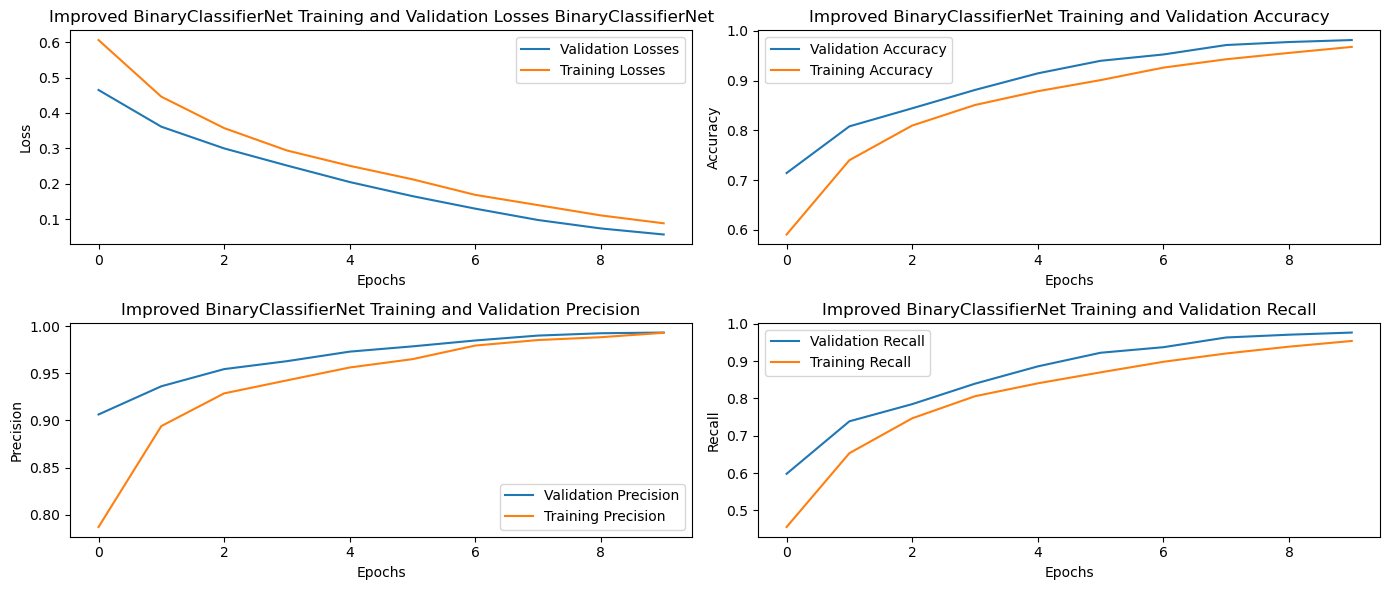

In [29]:
# Plotting metrics
plt.figure(figsize=(14, 6))

# First subplot (Training and Validation Losses)
plt.subplot(2, 2, 1)
plt.plot(val_losses, label='Validation Losses')
plt.plot(train_losses, label='Training Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Improved BinaryClassifierNet Training and Validation Losses BinaryClassifierNet')
plt.legend()

# Second subplot (Training and Validation Accuracy)
plt.subplot(2, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.plot(train_accuracies, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Improved BinaryClassifierNet Training and Validation Accuracy')
plt.legend()

# Third subplot (Training and Validation Precision)
plt.subplot(2, 2, 3)
plt.plot(val_precisions, label='Validation Precision')
plt.plot(train_precisions, label='Training Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Improved BinaryClassifierNet Training and Validation Precision')
plt.legend()

# Fourth subplot (Training and Validation Recall)
plt.subplot(2, 2, 4)
plt.plot(val_recalls, label='Validation Recall')
plt.plot(train_recalls, label='Training Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Improved BinaryClassifierNet Training and Validation Recall')
plt.legend()

plt.tight_layout()
plt.show()

Accuracy on the test set: 98.50%
Precision: 0.99
Recall: 0.98
F1 Score: 0.99


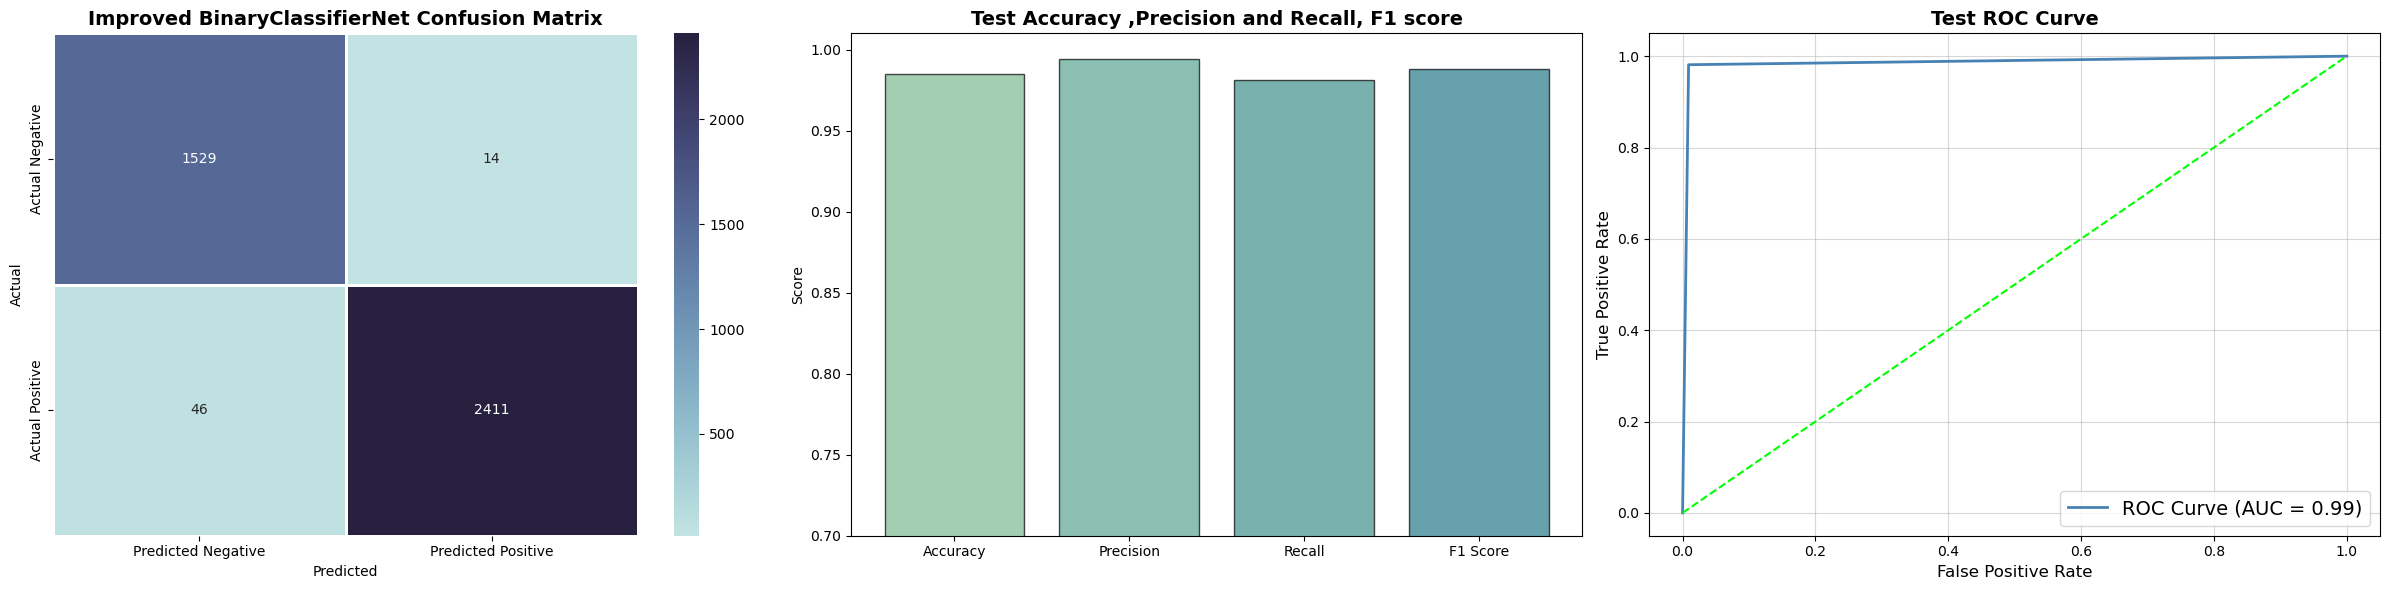

In [30]:
# Evaluate on Test Set
correct = 0
total = 0
all_predictions = []
all_labels = []

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data

        # Transfer data to GPU if available
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = net(inputs)

        # Binary classification: use a threshold of 0.7 to decide the class
        predicted = (outputs > 0.7).float()

        # Add predictions and labels
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        # Calculate accuracy
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_predictions)

# Calculate precision, recall, and F1-score
precision = precision_score(all_labels, all_predictions, average='binary')
recall = recall_score(all_labels, all_predictions, average='binary')
f1 = f1_score(all_labels, all_predictions, average='binary')
accuracy= correct / total

# Print accuracy and other metrics
print(f'Accuracy on the test set: {accuracy*100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Plot Confusion Matrix
fpr, tpr, thresholds = roc_curve(all_labels, all_predictions)
roc_auc = auc(fpr, tpr)

# Plot Confusion Matrix and ROC Curve
plt.figure(figsize=(24, 6))

# Confusion Matrix
plt.subplot(1, 3, 1)
sns.heatmap(cm, annot=True, fmt='.0f', cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True),
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'], linewidths=1, linecolor="white")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Improved BinaryClassifierNet Confusion Matrix', fontsize=14, weight="bold")

plt.subplot(1,3,2)

plt.bar(['Accuracy', 'Precision', 'Recall', 'F1 Score'], [accuracy, precision, recall, f1], color=sns.color_palette("crest", as_cmap=False),edgecolor="black",alpha=0.7)
plt.ylabel('Score')
plt.title('Test Accuracy ,Precision and Recall, F1 score',fontsize=14, weight="bold")
plt.ylim(0.7, 1.01)

# ROC Curve
plt.subplot(1, 3, 3)
plt.plot(fpr, tpr, color='steelblue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='lime', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.title('Test ROC Curve', fontsize=14, weight="bold")
plt.legend(loc='lower right',fontsize=14)
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()
